In [1]:
### Reference: https://www.youtube.com/watch?v=QIUxPv5PJOY

In [2]:
#import the libraries
!pip install pandas_datareader
!pip install keras
!pip install tensorflow
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import math

In [3]:
#pip list #check the list of software within pip

In [4]:
#get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2019-01-01', end='2021-12-31')

In [5]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,39.840000,39.119999,39.632500,39.435001,140014000.0,38.233898
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.277523
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.464802
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,35.936081
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.856094
...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749


In [6]:
df.shape 

(758, 6)

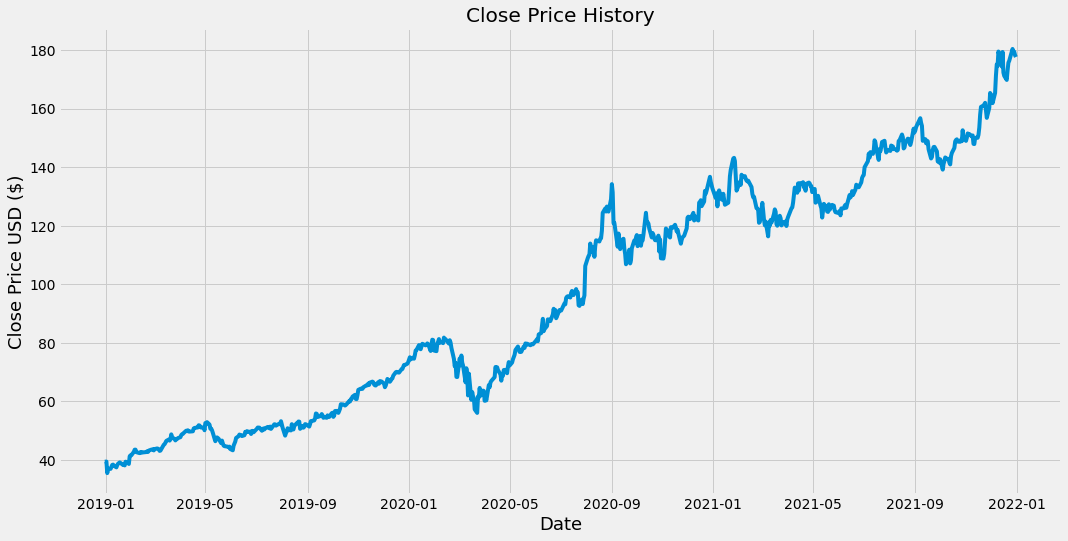

In [7]:
#visulize the closing price history
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.show()

In [8]:
#new dataframe with only the 'close column'
df_close = df.filter(['Close'])

#convert dataframe to numpy
dataset = df_close.values

In [9]:
training_data_len = math.ceil(len(dataset)* .8) #80% of the data to be training data
training_data_len

607

In [10]:
#scale data before using neutron network
scaler = MinMaxScaler (feature_range =(0,1))
scaled_data = scaler.fit_transform(dataset)

In [11]:
scaled_data

array([[0.02685063],
       [0.02716142],
       [0.        ],
       [0.01048123],
       [0.0099114 ],
       [0.01478079],
       [0.01920121],
       [0.02004731],
       [0.01743994],
       [0.01348574],
       [0.01878681],
       [0.02201578],
       [0.02360437],
       [0.02526204],
       [0.01918395],
       [0.02025451],
       [0.0181479 ],
       [0.02688514],
       [0.02436413],
       [0.02156682],
       [0.03981834],
       [0.04187315],
       [0.0420113 ],
       [0.05017871],
       [0.05523801],
       [0.05534164],
       [0.04964343],
       [0.04872827],
       [0.04703605],
       [0.04955709],
       [0.0483311 ],
       [0.04940169],
       [0.04874552],
       [0.04962615],
       [0.05152556],
       [0.04985063],
       [0.05314869],
       [0.05532435],
       [0.05549704],
       [0.05642946],
       [0.05345948],
       [0.05660214],
       [0.05812167],
       [0.05756911],
       [0.05582512],
       [0.05233712],
       [0.05304509],
       [0.063

In [12]:
#create the training data set
train_data = scaled_data[0:training_data_len, :]

#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(100,len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])
    if i <=101:
        print(x_train)
        print(y_train)
        print()

[array([0.02685063, 0.02716142, 0.        , 0.01048123, 0.0099114 ,
       0.01478079, 0.01920121, 0.02004731, 0.01743994, 0.01348574,
       0.01878681, 0.02201578, 0.02360437, 0.02526204, 0.01918395,
       0.02025451, 0.0181479 , 0.02688514, 0.02436413, 0.02156682,
       0.03981834, 0.04187315, 0.0420113 , 0.05017871, 0.05523801,
       0.05534164, 0.04964343, 0.04872827, 0.04703605, 0.04955709,
       0.0483311 , 0.04940169, 0.04874552, 0.04962615, 0.05152556,
       0.04985063, 0.05314869, 0.05532435, 0.05549704, 0.05642946,
       0.05345948, 0.05660214, 0.05812167, 0.05756911, 0.05582512,
       0.05233712, 0.05304509, 0.06338817, 0.06685891, 0.0682403 ,
       0.07172827, 0.07585515, 0.07913595, 0.07656311, 0.07937769,
       0.0913439 , 0.08436793, 0.08037919, 0.07701205, 0.07991297,
       0.08034465, 0.08246852, 0.08469601, 0.08949632, 0.09179287,
       0.09237995, 0.09464196, 0.09999483, 0.09895878, 0.1008927 ,
       0.09800907, 0.09787093, 0.09849255, 0.0985271 , 0.1052

In [13]:
#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape #LSTM require 3 dimensional

(507, 100, 1)

In [15]:
#Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
#compile the model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [17]:
#train the model #epochs is the no of literations to and back
model.fit(x_train, y_train, batch_size =1, epochs=1)

507/507 [==============================] - 12s 21ms/step - loss: 0.0039


In [18]:
#create the testing dataset -> new array with scaled values from 
#index 1722 (training_data_len minus i) to 2182

test_data = scaled_data[training_data_len - 100: , :]

x_test= []
y_test= dataset[training_data_len:, :] #predicted values

for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])


In [19]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [20]:
#reshape the data into 3D for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
#get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) 

#un-scaling the values, predictions to be same values as y_test (based on x_test dataset)

In [22]:
#Root mean squared error (RMSE) - accuracy of the model and standard deviation of residuals
#lower RMSE indicate a better fit
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7.8677333301266295

<ipython-input-23-44d276b9caf3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


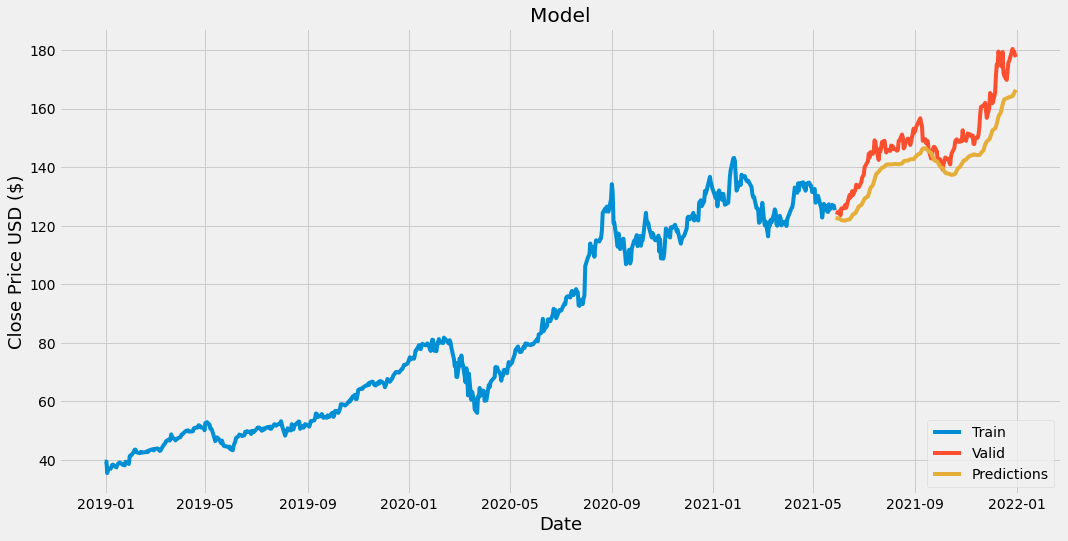

In [23]:
#plot the data
train = df_close[:training_data_len]
valid = df_close[training_data_len:]

valid['Predictions'] = predictions

#visulisation the data
plt.figure(figsize =(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Valid', 'Predictions'], loc='lower right')
plt.show()

In [24]:
#showing the valid and predicted prices
valid


,Close,Predictions
Date,,
2021-05-28,124.610001,122.590401
2021-06-01,124.279999,122.464249
2021-06-02,125.059998,122.285286
2021-06-03,123.540001,122.127342
2021-06-04,125.889999,121.906128
...,...,...
2021-12-27,180.330002,164.202972
2021-12-28,179.289993,164.739151
2021-12-29,179.380005,165.324280


In [25]:
#predict AAPL closing price
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end= '2022-02-10')

In [26]:
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price values and convert the DF to an array
last_100 = new_df[-100:].values
#scale the data to be values between 0 and 1
last_100_scaled = scaler.transform(last_100)
#create an empty list
X_test = []
#append the past 100 days 
X_test.append(last_100_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#reshape the data to 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the sclaing
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[162.87221]]


In [27]:
#predict AAPL closing price
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2022-01-21', end= '2022-02-16')

print (apple_quote2['Close'])


Date
2022-01-20    164.509995
2022-01-21    162.410004
2022-01-24    161.619995
2022-01-25    159.779999
2022-01-26    159.690002
2022-01-27    159.220001
2022-01-28    170.330002
2022-01-31    174.779999
2022-02-01    174.610001
2022-02-02    175.839996
2022-02-03    172.899994
2022-02-04    172.389999
2022-02-07    171.660004
2022-02-08    174.830002
2022-02-09    176.279999
2022-02-10    172.119995
2022-02-11    168.639999
2022-02-14    168.880005
2022-02-15    172.789993
2022-02-16    172.550003
Name: Close, dtype: float64


In [28]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (507, 1)
Test data prediction: (151, 1)


In [29]:
# Transform back to original form

#train_predict = scaler.inverse_transform(train_predict)
#test_predict = scaler.inverse_transform(test_predict)
#original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
#original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [31]:
# Evaluation metrices RMSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
#print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
#print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
#print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
#print("-------------------------------------------------------------------------------------")
#print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
#print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
#print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  5.752928221808099
Train data MSE:  33.0961831252761
Test data MAE:  4.911122835599459
-------------------------------------------------------------------------------------
Test data RMSE:  21568.91131551613
Test data MSE:  465217935.33659977
Test data MAE:  21487.32792470222


In [45]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')


In [46]:
evaluate_prediction(test_predict, y_test, 'LSTM')

LSTM:
Mean Absolute Error: 7.9100
Root Mean Square Error: 8.9852

